In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["figure.dpi"] = (100)

from OpticalBeam import *

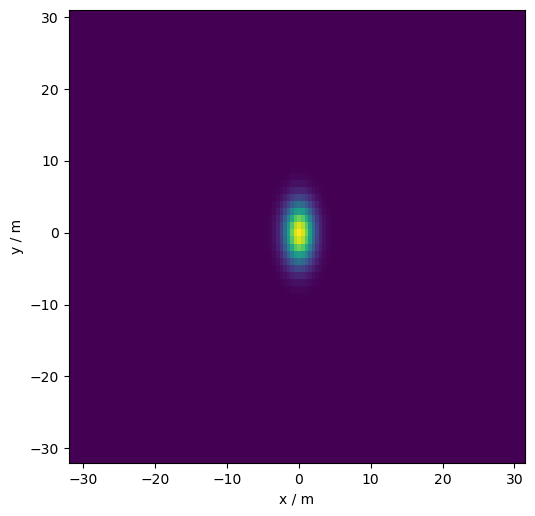

In [6]:
gb = SingleFrequencyBeam.GaussianBeam(1.0e12, 128, 64, 0.5, 1.0,2.0,4.0)
gb.plot_Intensity()
plt.show()